In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import scipy.stats
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [6]:
a = 225^2
a

227

# Задания для самостоятельного решения


1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [7]:
sigma = 225**0.5 # дисперсия 225, ст.откл = корень от дисперсии
Z = 1.96  # 95%
e = 3 #%

N = ((sigma*Z)/e)**2
N

96.03999999999998

2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [3]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

stats.ttest_ind(population_men,population_women)


Ttest_indResult(statistic=2.0656644042558203, pvalue=0.038860201908813716)

Н0 - выборки равны  
Н1 - выборки разные  
значение pvalue=0.038 больше alpha=0.001. Значит мы не можем отклонить нулевую гипотезу. Скорее всего выборки равны.  
если бы alpha=0.05, то можно отвергнуть нулевую гипотезу и сказать, что средний рост в выборках разный, мужчины выше. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005D59220548>]],
      dtype=object)

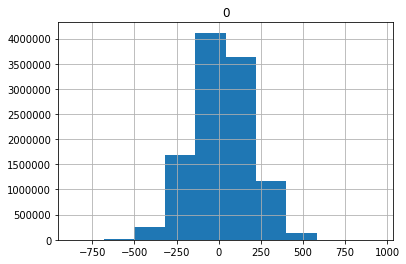

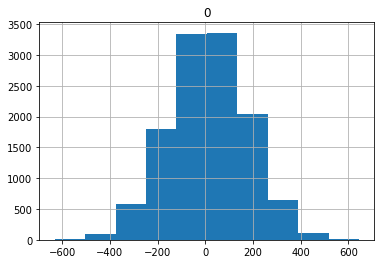

In [11]:
pd.DataFrame(population_men).hist()
pd.DataFrame(population_women).hist()

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [4]:
sigma = 150
Z = 1.96  # 95%
e = 50 #%

N = ((sigma*Z)/e)**2
N

34.5744

4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05 ?

In [8]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [9]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations) # Возможно вам пригодится эта функция.
pvalue

stat, p, dof, expected = chi2_contingency(observations)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Н0 данные не отличаются. Волшебник шарлатан')
else:
    print('Н1 данные разные. Волшебник молодец')

stat=2.605, p=0.107
Н0 данные не отличаются. Волшебник шарлатан


5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [10]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
di=0.9
def mean_confidence_interval(data, confidence=di):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h
print(mean_confidence_interval(data, di))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


6.Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [11]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

Н0 - выборки равны
Н1 - выборки разные

In [16]:
alpha = 0.05
result = stats.ttest_ind(data_1, data_2, equal_var=False)
print(result)

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)


In [15]:
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, выборки принадлежат разным множествам')
else:
    print('Не отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу, выборки принадлежат разным множествам


7.На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.
Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное, Альтернативная гипотеза - распределение не нормальное.

Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

Н0 - распределение нормальное   
Н1 - распределение не нормальное
alpha=0.05
т.к. p-value < alpha, значит мы отвергаем гипотезу о нормальном распределении.

8.Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)  
а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы?

In [ ]:
Н0 - выборки имеют равные показатели. Препараты не отличаются.
Н1 - выборки имеют разные показатели. Препараты отличаются.

In [18]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)
alpha = 0.05

In [19]:
result = stats.ttest_ind(A, B, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, различия есть')
else:
    print('Не отвергаем нулевую гипотезу. Препараты не отличаются')

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)
Не отвергаем нулевую гипотезу. Препараты не отличаются


b) При каком минимальном P-values различия были бы уже значимы? - при P-values < 0.05